<a href="https://colab.research.google.com/github/ChaimaeBouassab/EduPredict-/blob/main/TP4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Importation des bibliothèques
import pandas as pd
import numpy as np

# Chargement des données (remplacer 'chemin_vers_fichier' par le chemin réel)
url = "/content/dataset_classification_tp.csv"
df = pd.read_csv(url)


df = pd.read_csv(url)

# Aperçu des données
print(df.head())

# Vérification des valeurs manquantes
print(df.isnull().sum())

# Statistiques descriptives
print(df.describe())





   Heures_etude  Participation_classe  Presence  Resultat
0             7                     3        50         0
1             4                     5        60         0
2             8                     3        77         1
3             5                     1        74         0
4             7                     5        99         0
Heures_etude            0
Participation_classe    0
Presence                0
Resultat                0
dtype: int64
       Heures_etude  Participation_classe    Presence    Resultat
count    100.000000            100.000000  100.000000  100.000000
mean       5.320000              4.820000   76.080000    0.180000
std        2.639559              2.618427   14.319359    0.386123
min        1.000000              1.000000   50.000000    0.000000
25%        3.000000              3.000000   65.750000    0.000000
50%        5.000000              5.000000   77.500000    0.000000
75%        8.000000              7.000000   86.250000    0.000000
max    

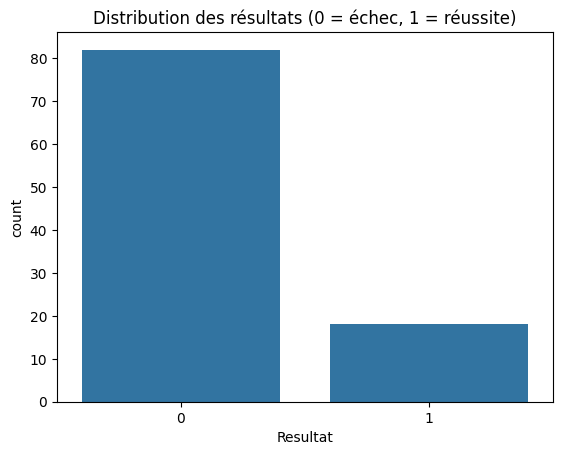

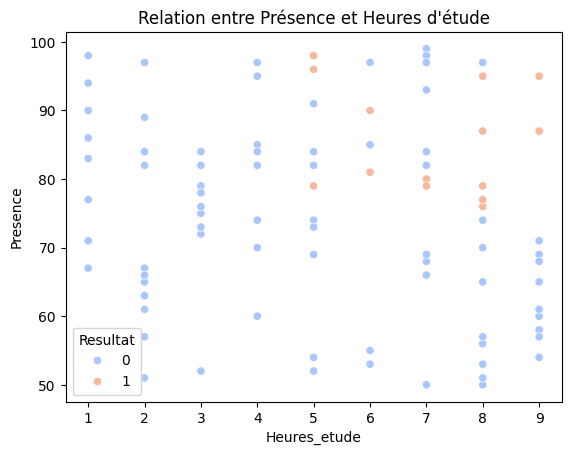

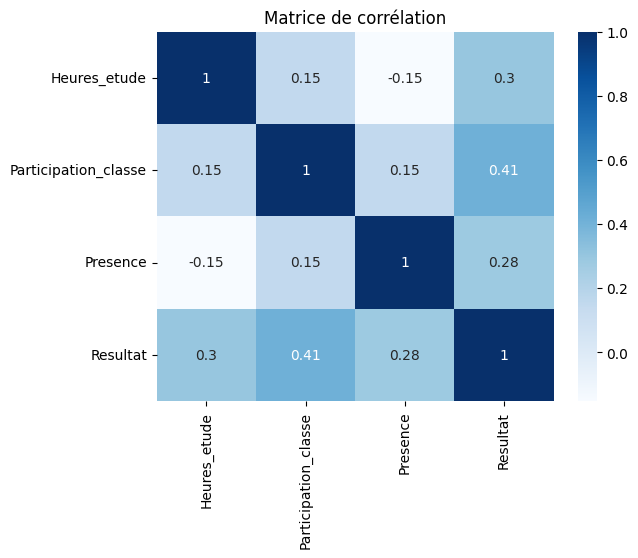

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution des résultats
sns.countplot(data=df, x='Resultat')
plt.title('Distribution des résultats (0 = échec, 1 = réussite)')
plt.show()

# Relation entre les heures d'étude et le résultat
sns.scatterplot(data=df, x='Heures_etude', y='Presence', hue='Resultat',
palette='coolwarm')
plt.title('Relation entre Présence et Heures d\'étude')
plt.show()

# Matrice de corrélation
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Matrice de corrélation')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Séparation des caractéristiques (X) et de la cible (y)
X = df[['Heures_etude', 'Participation_classe', 'Presence']]
y = df['Resultat']

# Séparation en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Modèles
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(max_depth=5)
}

# Entraînement des modèles
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} entraîné.")

#En résumé, l'entraînement des modèles consiste à ajuster les paramètres internes
#des modèles de manière à ce qu'ils puissent prédire avec précision les étiquettes pour de
# nouvelles données basées sur les exemples fournis.
#Cette étape est cruciale pour que les modèles puissent être utiles et efficaces dans des applications réelles.

Logistic Regression entraîné.
K-Nearest Neighbors entraîné.
Decision Tree entraîné.



Modèle : Logistic Regression
Accuracy : 0.9
Rapport de classification :
               precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.67      0.80         6

    accuracy                           0.90        20
   macro avg       0.94      0.83      0.87        20
weighted avg       0.91      0.90      0.89        20



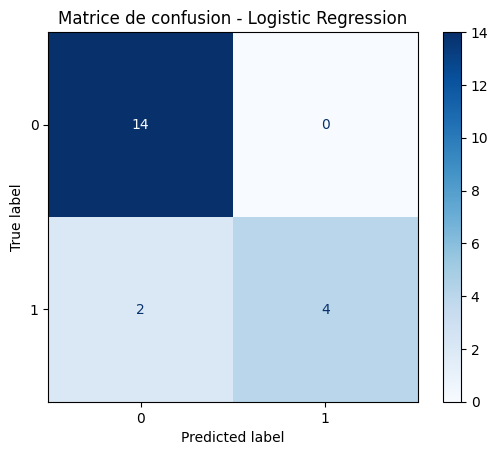


Modèle : K-Nearest Neighbors
Accuracy : 0.85
Rapport de classification :
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.80      0.67      0.73         6

    accuracy                           0.85        20
   macro avg       0.83      0.80      0.81        20
weighted avg       0.85      0.85      0.85        20



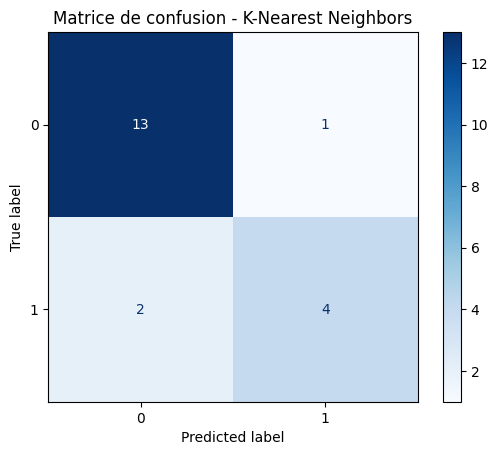


Modèle : Decision Tree
Accuracy : 0.75
Rapport de classification :
               precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.60      0.50      0.55         6

    accuracy                           0.75        20
   macro avg       0.70      0.68      0.69        20
weighted avg       0.74      0.75      0.74        20



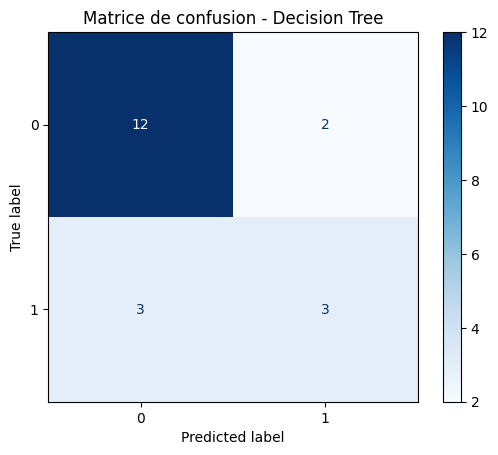

In [13]:
#VI. Évaluation
#Evaluation des performances

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\nModèle : {name}")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Rapport de classification :\n", classification_report(y_test, y_pred))

    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"Matrice de confusion - {name}")
    plt.show()

In [14]:
pip install tabulate



Modèle : Logistic Regression
Accuracy : 0.9

Rapport de classification :

+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
+==============+=============+==========+============+===========+
| 0            |      0.875  | 1        |   0.933333 |      14   |
+--------------+-------------+----------+------------+-----------+
| 1            |      1      | 0.666667 |   0.8      |       6   |
+--------------+-------------+----------+------------+-----------+
| accuracy     |      0.9    | 0.9      |   0.9      |       0.9 |
+--------------+-------------+----------+------------+-----------+
| macro avg    |      0.9375 | 0.833333 |   0.866667 |      20   |
+--------------+-------------+----------+------------+-----------+
| weighted avg |      0.9125 | 0.9      |   0.893333 |      20   |
+--------------+-------------+----------+------------+-----------+


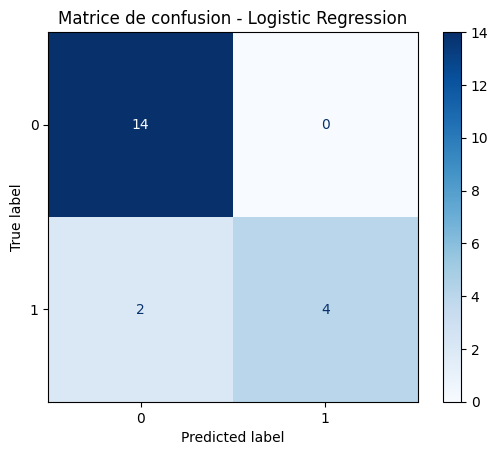


Modèle : K-Nearest Neighbors
Accuracy : 0.85

Rapport de classification :

+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
+==============+=============+==========+============+===========+
| 0            |    0.866667 | 0.928571 |   0.896552 |     14    |
+--------------+-------------+----------+------------+-----------+
| 1            |    0.8      | 0.666667 |   0.727273 |      6    |
+--------------+-------------+----------+------------+-----------+
| accuracy     |    0.85     | 0.85     |   0.85     |      0.85 |
+--------------+-------------+----------+------------+-----------+
| macro avg    |    0.833333 | 0.797619 |   0.811912 |     20    |
+--------------+-------------+----------+------------+-----------+
| weighted avg |    0.846667 | 0.85     |   0.845768 |     20    |
+--------------+-------------+----------+------------+-----------+


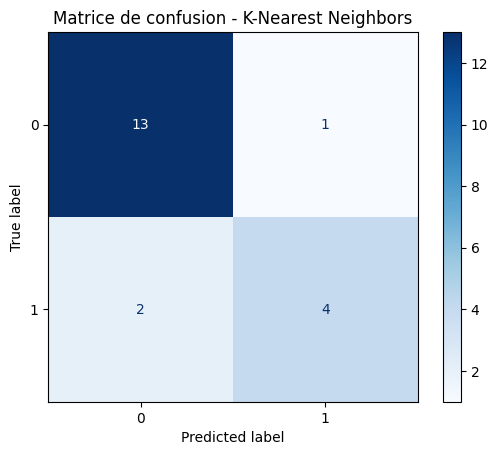


Modèle : Decision Tree
Accuracy : 0.75

Rapport de classification :

+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
+==============+=============+==========+============+===========+
| 0            |        0.8  | 0.857143 |   0.827586 |     14    |
+--------------+-------------+----------+------------+-----------+
| 1            |        0.6  | 0.5      |   0.545455 |      6    |
+--------------+-------------+----------+------------+-----------+
| accuracy     |        0.75 | 0.75     |   0.75     |      0.75 |
+--------------+-------------+----------+------------+-----------+
| macro avg    |        0.7  | 0.678571 |   0.68652  |     20    |
+--------------+-------------+----------+------------+-----------+
| weighted avg |        0.74 | 0.75     |   0.742947 |     20    |
+--------------+-------------+----------+------------+-----------+


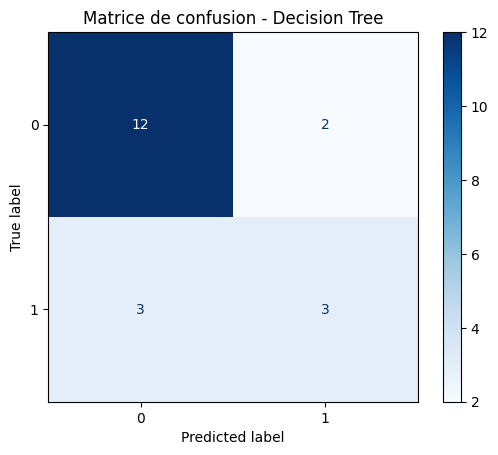


Résumé des performances des modèles :

+----+---------------------+------------+
|    | Modèle              |   Accuracy |
+====+=====================+============+
|  0 | Logistic Regression |       0.9  |
+----+---------------------+------------+
|  1 | K-Nearest Neighbors |       0.85 |
+----+---------------------+------------+
|  2 | Decision Tree       |       0.75 |
+----+---------------------+------------+


In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

# Liste pour stocker les résultats
results = []

for name, model in models.items():
    y_pred = model.predict(X_test)

    # Calculer l'exactitude
    accuracy = accuracy_score(y_test, y_pred)

    # Récupérer le rapport de classification
    class_report = classification_report(y_test, y_pred, output_dict=True)
    class_report_df = pd.DataFrame(class_report).transpose()

    # Afficher les résultats dans un tableau
    print(f"\nModèle : {name}")
    print("Accuracy :", accuracy)
    print("\nRapport de classification :\n")
    print(tabulate(class_report_df, headers='keys', tablefmt='grid'))

    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"Matrice de confusion - {name}")
    plt.show()

    # Stocker les résultats
    results.append({"Modèle": name, "Accuracy": accuracy})

# Afficher un tableau récapitulatif des résultats
results_df = pd.DataFrame(results)
print("\nRésumé des performances des modèles :\n")
print(tabulate(results_df, headers='keys', tablefmt='grid'))


In [19]:
  # VII. Implémentation et test final
  # Interface interactive avec Streamlit (facultatif)
  # Pour tester les prédictions avec une interface, utiliser Streamlit :
# Installer Streamlit dans Google Colab
!pip install streamlit

# Interface simple
import streamlit as st

st.title("Prédiction de réussite d'examen")
hours = st.number_input("Heures d'étude :", 0, 10)
participation = st.number_input("Participation en classe (1-10) :", 1, 10)
presence = st.number_input("Présence (%) :", 0, 100)

if st.button("Prédire"):
    input_data = scaler.transform([[hours, participation, presence]])
    prediction = models["Logistic Regression"].predict(input_data)[0]
    result = "Réussite" if prediction == 1 else "Échec"
    st.write(f"Résultat prédit : {result}")

2024-11-12 13:35:38.708 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-12 13:35:38.714 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-12 13:35:38.718 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-12 13:35:38.724 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-12 13:35:38.729 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-12 13:35:38.732 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-12 13:35:38.737 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-12 13:35:38.742 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [20]:
# Installer Streamlit dans Google Colab
!pip install streamlit

# Interface simple
import streamlit as st

st.title("Prédiction de réussite d'examen")
hours = st.number_input("Heures d'étude :", 0, 10)
participation = st.number_input("Participation en classe (1-10) :", 1, 10)
presence = st.number_input("Présence (%) :", 0, 100)

if st.button("Prédire"):
    input_data = scaler.transform([[hours, participation, presence]])
    prediction = models["Logistic Regression"].predict(input_data)[0]
    result = "Réussite" if prediction == 1 else "Échec"
    st.write(f"Résultat prédit : {result}")

2024-11-12 13:36:12.844 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-12 13:36:12.847 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-12 13:36:12.849 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-12 13:36:12.851 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-12 13:36:12.853 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-12 13:36:12.854 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-12 13:36:12.856 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-12 13:36:12.857 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [22]:
import pickle

# Assuming model is your trained logistic regression model
with open("model_logistic_regression.pkl", "wb") as f:
    pickle.dump(model, f)

# If you used a scaler, save it as well
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)